## Object reconstruction from a cloud of points in 2D using $\alpha$-shapes and Vietoris-Rips complexes

We will generate a cloud of points in 2D space, in our example a circle. Then Vietoris-Rips, Chech and $\alpha$-complexes for the given radius will be constructed. 

The number of simplices for each construction will be determined and the resulting complex drawn using matplotlib.

Let us start with Vietoris-Rips and $\alpha$ complexes, since we can calculate them from Python. First some basic imports and helper functions.

In [1]:
import dionysus
import math
from random import random
from matplotlib import pyplot
import time

Now we define methods for generating a cloud of points and drawing.

In [2]:
def generate_circle(n, radius, max_noise):
    """
    Generate n points on a sphere with the center in the point (0,0) 
    with the given radius. 
    
    Noise is added so that the distance from
    the generated point to some point on the sphere does not
    exceed max_noise parameter.
    
    Returns the list of generated points.    
    """
    points = []
    for i in range(n):
        angle = 2 * math.pi * random()
        noise = max_noise * random()
        r = radius * (1 + noise)
        point = [r * math.cos(angle), r * math.sin(angle)]
        points.append(point)
    return points

In [3]:
def plot_points(points, figure=None, radius=0, color='r'):
    """
    Plot the given list of points on the given figure using matplotlib. 
    If figure is not specified plot on the current figure.
    
    If radius is bigger than zero, then around each
    point the ball centered in the point with the 
    given radius and color will be drawn. If color is not given 
    circles are drawn using red color.
    """
    xs, ys = map(list, zip(*points))
    pyplot.axis([min(xs)-1, max(xs)+1,min(ys)-1,max(ys)+1])
    pyplot.plot(xs, ys, 'ro')
    if radius > 0:
        if figure is None:
            figure = pyplot.gcf()
        axes = figure.gca()
        for circle in [pyplot.Circle(point, radius, color=color)
                       for point in points]:
            axes.add_artist(circle)

In [4]:
def get_points(points, indices):
    '''
    Get data from point array on the given indices.
    Useful since simplex spanned by a list of points
    is given as a list of positions of the points
    in a points array.
    '''
    return [points[index] for index in indices]

def draw_triangle(triangle):
    '''
    Draw a triangle on the current figure. 
    Triangle must be given as a list of three 2D points, 
    each point as a list of two numbers.
    '''
    p1, p2, p3 = triangle
    pyplot.plot([p1[0], p2[0]],[p1[1],p2[1]])
    pyplot.plot([p1[0], p3[0]],[p1[1],p3[1]])
    pyplot.plot([p2[0], p3[0]],[p2[1],p3[1]])
        
def draw_line(line):
    '''
    Draw a line on the current figure.
    Line must be given as a list of two 2D points, 
    each point as a list of two numbers.    
    '''
    p1, p2 = line
    pyplot.plot([p1[0], p2[0]],[p1[1],p2[1]])
    
def draw_point(point):
    '''
    Draw a point on the current figure.
    Point must be given as a list of two numbers.    
    '''
    pyplot.plot(point)

def draw_simplicial_complex(simplices, points):
    '''
    Draw 2D simplicial complex on the current figure. 
    Input must be a list of simplices, each simplex a
    list of indices in the points array. 
    '''
    handlers = [draw_point, draw_line, draw_triangle]
    for simplex in simplices:
        handlers[len(simplex)-1](get_points(points, simplex))

<IPython.core.display.Javascript object>


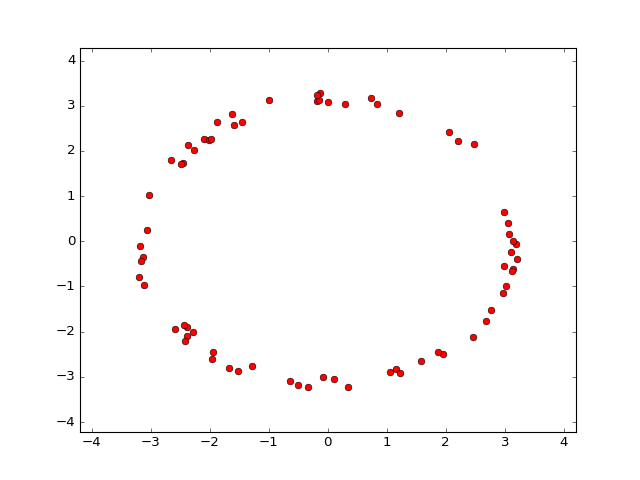

In [16]:
%matplotlib notebook
circle = generate_circle(70, 3, 0.1)
plot_points(circle)

Now construct $\alpha$-shapes and Vietoris-Rips complex from this cloud of points.

In [6]:
def rips(points, skeleton, max):
    """
    Generate the Vietoris-Rips complex on the given set of points in 2D.
    Only simplexes up to dimension skeleton are computed.
    The max parameter denotes the distance cut-off value.
    """
    distances = dionysus.PairwiseDistances(points)
    rips = dionysus.Rips(distances)
    simplices = dionysus.Filtration()
    rips.generate(skeleton, max, simplices.append)
    print time.asctime(), "Generated complex: %d simplices" % len(simplices)
    for s in simplices: s.data = rips.eval(s)
    print time.asctime(), simplices[0], '...', simplices[-1]
    return [list(simplex.vertices) for simplex in simplices]

In [7]:
def alpha(points, radius):
    f = dionysus.Filtration()
    dionysus.fill_alpha_complex(points, f)
    ret = [list(s.vertices) for s in f if s.data[0] < radius]
    print "Total number of simplices:", len(ret)
    return ret

Mon Apr  4 13:11:42 2016 Generated complex: 744 simplices
Mon Apr  4 13:11:42 2016 <0> 0.000000 ... <69> 0.000000
Total number of simplices: 230


<IPython.core.display.Javascript object>


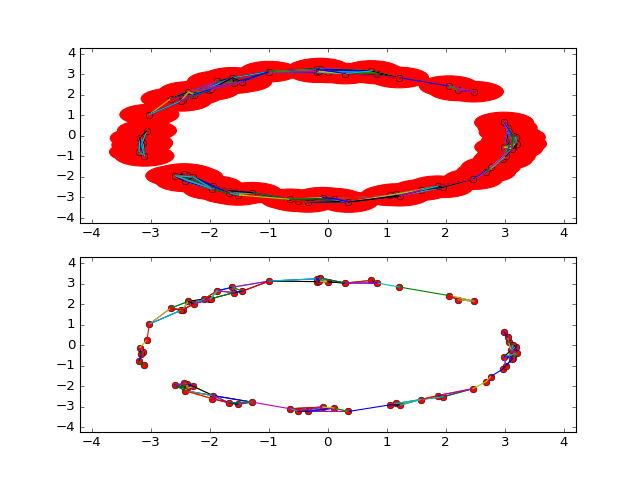

In [18]:
%matplotlib notebook
radius = 0.5
rips_complex = rips(points=circle, skeleton=2, max=2*radius)
alpha_complex = alpha(circle, radius/2)
pyplot.subplot(211)
plot_points(circle, radius=radius)
draw_simplicial_complex(rips_complex, circle)
pyplot.subplot(212)
plot_points(circle)
draw_simplicial_complex(alpha_complex, circle)

Mon Apr  4 13:11:25 2016 Generated complex: 1365 simplices
Mon Apr  4 13:11:25 2016 <0> 0.000000 ... <69> 0.000000
Total number of simplices: 247


<IPython.core.display.Javascript object>


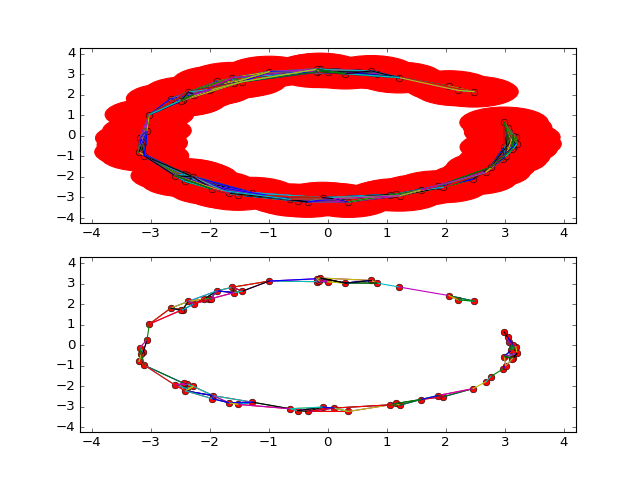

In [17]:
%matplotlib notebook
radius = 0.75
rips_complex = rips(points=circle, skeleton=2, max=2*radius)
alpha_complex = alpha(circle, radius/2)
pyplot.subplot(211)
plot_points(circle, radius=radius)
draw_simplicial_complex(rips_complex, circle)
pyplot.subplot(212)
plot_points(circle)
draw_simplicial_complex(alpha_complex, circle)

Mon Apr  4 13:13:30 2016 Generated complex: 4828 simplices
Mon Apr  4 13:13:30 2016 <0> 0.000000 ... <69> 0.000000
Total number of simplices: 256


<IPython.core.display.Javascript object>


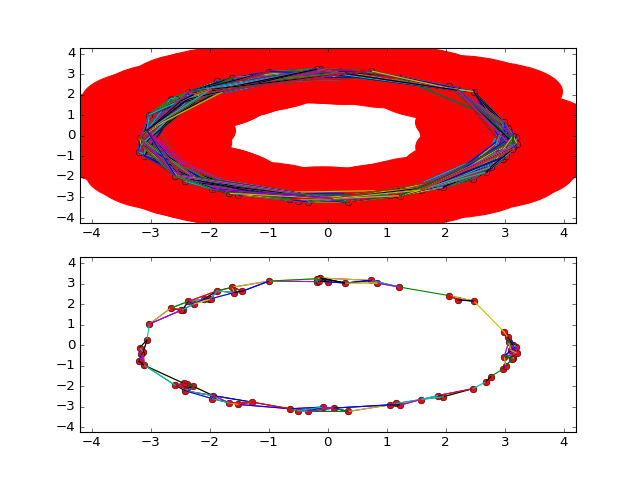

In [21]:
%matplotlib notebook
radius = 1.5
rips_complex = rips(points=circle, skeleton=2, max=2*radius)
alpha_complex = alpha(circle, 1.0*radius/2)
pyplot.subplot(211)
plot_points(circle, radius=radius)
draw_simplicial_complex(rips_complex, circle)
pyplot.subplot(212)
plot_points(circle)
draw_simplicial_complex(alpha_complex, circle)

Now just compute the entire Vietoris-Rips complex without restriction on the top dimension. Print also the dimension of such complex.

In [10]:
radius = 0.5
max_dimension = 10000
rips_complex = rips(points=circle, skeleton=max_dimension, max=2*radius)
print 'Dimension', max((len(s) for s in rips_complex))

Mon Apr  4 13:09:36 2016 Generated complex: 2469 simplices
Mon Apr  4 13:09:36 2016 <0> 0.000000 ... <69> 0.000000
Dimension 9


In [11]:
radius = 0.75
max_dimension = 10000
rips_complex = rips(points=circle, skeleton=max_dimension, max=2*radius)
print 'Dimension', max((len(s) for s in rips_complex))

Mon Apr  4 13:09:36 2016 Generated complex: 6464 simplices
Mon Apr  4 13:09:36 2016 <0> 0.000000 ... <69> 0.000000
Dimension 11
